# Visualising Results

In this notebook we'll run inference with a trained instance of the network and look at the results. This assumes you have trained weights already or have downloaded those for the bundle. Below we run the command line to invoke inference and produce segmentation images in an output directory. This assumes a number of things:

* The dataset directory `test_data` exists and contains images and their labels.
* We only want to run inference of the images and not the labels so the file pattern is set to match only those.
* The output directory is `output` and will have results in separate subdirectories.
* The checkpoint path is provided to a pre-trained weight file, if this is omitted `$BUNDLE/models/model.py` is used instead.

In [ ]:
%%bash

# assumes we're running in the docs directory
cd ..

BUNDLE="$(pwd)"
# change this to your checkpoint file
CKPT='$BUNDLE/results/output_231004_163050/model_key_metric=0.5544.pt'

export PYTHONPATH="$BUNDLE"

python -m monai.bundle run \
    --meta_file "$BUNDLE/configs/metadata.json" \
    --config_file "$BUNDLE/configs/inference.yaml" \
    --bundle_root "$BUNDLE" \
    --dataset_dir "$BUNDLE/test_data" \
    --output_dir "$BUNDLE/output" \
    --file_pattern 'img*.nii.gz' \
    --ckpt_path "$CKPT"

(128, 128, 128) (128, 128, 128) (128, 128, 128)


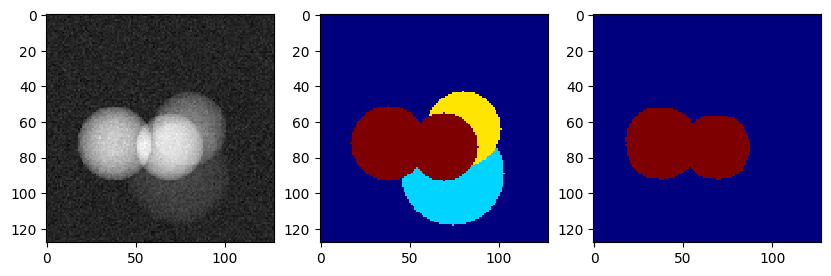

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib

plt.rcParams["image.interpolation"] = "none"

img_orig=nib.load("../test_data/img01.nii.gz").get_fdata()
lbl_orig=nib.load("../test_data/lbl01.nii.gz").get_fdata()
pred=nib.load("../output/img01/img01.nii.gz").get_fdata()

print(img_orig.shape,lbl_orig.shape, pred.shape)

_,(ax0,ax1,ax2)=plt.subplots(1,3,figsize=(10,10))

ax0.imshow(np.average(img_orig, 0), cmap="gray")
ax1.imshow(np.max(lbl_orig, 0), cmap="jet")
ax2.imshow(np.max(pred, 0), cmap="jet")